In [105]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [106]:
d= range(0,252)
type(d)

range

In [107]:
d_t = list(range(0,252))
print(len(d_t))
print(type(d_t))

252
<class 'list'>


In [108]:
np.random.seed(102)
mu = 0.001
sigma= 0.01

returns = np.random.normal(mu, sigma, size=252 )

print(len(returns))
print(type(returns))

252
<class 'numpy.ndarray'>


In [109]:
np.random.seed(102)

mu = 0.001

sigma= 0.01

p_0 =369

returns = np.random.normal(mu, sigma, size=252 )

cum= returns.cumsum()

print(returns[0:10] )

print( cum[0:10] )

[ 0.01768068  0.01025862  0.01157997 -0.00820339  0.01399748  0.00431183
 -0.00409845 -0.00803099 -0.00030016 -0.02138203]
[0.01768068 0.0279393  0.03951927 0.03131588 0.04531336 0.04962519
 0.04552674 0.03749575 0.03719559 0.01581356]


In [123]:
np.random.seed(102)

mu = 0.001

sigma= 0.01

p0= 369

returns = np.random.normal(mu, sigma, size=252 )

cum_g = (1+returns).cumprod() 

print ( returns[0:10] )

print( cum_g[0:10] )

[ 0.01768068  0.01025862  0.01157997 -0.00820339  0.01399748  0.00431183
 -0.00409845 -0.00803099 -0.00030016 -0.02138203]
[1.01768068 1.02812068 1.04002628 1.03149454 1.04593287 1.05044276
 1.04613757 1.03773605 1.03742456 1.01524231]


In [125]:
cum_g[-1] * 1000

np.float64(1286.8809156989014)

In [112]:
d_geomean= cum_g[-1]**(1/252)-1
d_arithmeticmean=np.mean(returns)

print(d_arithmeticmean)
print(d_geomean)

0.0010536621670886501
0.0010013796006063114


420.31806417158003
193
345.09186391878524
114


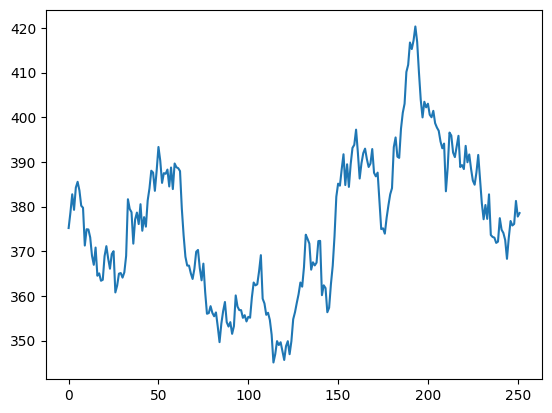

In [113]:
np.random.seed(102)
mu = 0.0001
sigma= 0.01
p0= 369
returns = np.random.normal(mu, sigma, size=252)
p_t = p0*(1+returns).cumprod()

plt.plot(p_t)
p_tmin = p_t.min()
p_tmax = p_t.max()
p_tmin_idx = np.argmin(p_t)
p_tmax_idx = np.argmax(p_t)
print(p_tmax)
print(p_tmax_idx)
print(p_tmin)
print(p_tmin_idx)


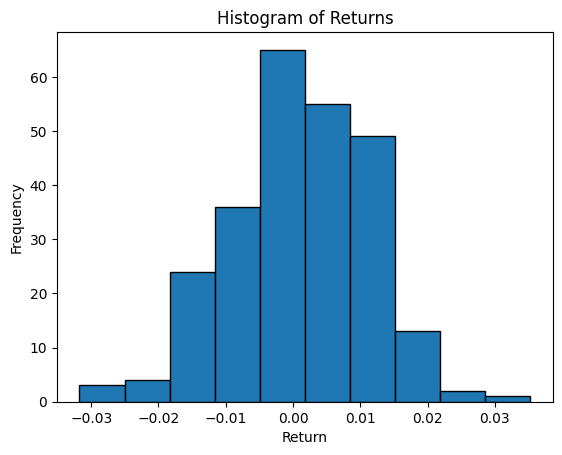

np.float64(0.0011547866449492065)

In [126]:
plt.hist(returns, bins=10, edgecolor='black')
plt.title('Histogram of Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

np.median(returns)

In [115]:
A = {'d_t': d_t,'p_t': list(p_t), 'r_t': list(returns) }
type(A)

dict

In [116]:
B = pd.DataFrame(A)
x= B.iloc[B.index==10]
B

,d_t,p_t,r_t
0,0,375.192072,0.016781
1,1,378.703351,0.009359
2,2,382.747891,0.010680
3,3,379.263588,-0.009103
4,4,384.230987,0.013097
...,...,...,...
247,247,375.764322,-0.002657
248,248,376.103788,0.000903
249,249,381.257774,0.013704
250,250,377.759837,-0.009175


In [117]:
spy= pd.read_csv('dataFiles/spy_2021_week2_activity.csv')

spy.head()


spy['d_t'] = spy.index
all = pd.merge(spy,B, on='d_t')
all

,Date,spy,spy_ret,d_t,p_t,r_t
0,2021-01-04,368.961823,-0.013614,0,375.192072,0.016781
1,2021-01-05,363.938782,0.006887,1,378.703351,0.009359
2,2021-01-06,366.445313,0.005979,2,382.747891,0.010680
3,2021-01-07,368.636139,0.014857,3,379.263588,-0.009103
4,2021-01-08,374.113129,0.005698,4,384.230987,0.013097
...,...,...,...,...,...,...
247,2021-12-27,470.600006,0.014152,247,375.764322,-0.002657
248,2021-12-28,477.26001,-0.000817,248,376.103788,0.000903
249,2021-12-29,476.869995,0.001279,249,381.257774,0.013704
250,2021-12-30,477.480011,-0.002765,250,377.759837,-0.009175


In [118]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     252 non-null    object 
 1   spy      252 non-null    object 
 2   spy_ret  252 non-null    float64
 3   d_t      252 non-null    int64  
 4   p_t      252 non-null    float64
 5   r_t      252 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 11.9+ KB


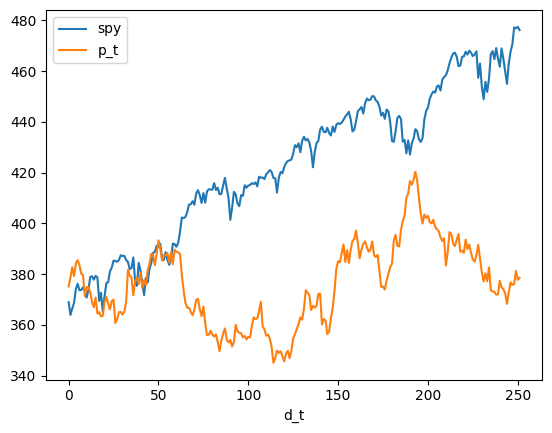

In [119]:
all['spy']=all['spy'].astype('float')

all.plot(x="d_t", y=["spy", "p_t"])

plt.show()